The purpose of this notebook is to use Python to analyze data using General Linear Models with a few other tests  thrown in. 

Generalized Linear Model (GLM) is an advanced statistical modelling technique formulated by John Nelder and Robert Wedderburn in 1972. It is an umbrella term that encompasses many other models, which allows the response variable y to have an error distribution other than a normal distribution.

It is worth your time to compare the formulas for t-test, ANOVA, MANOVA, ANCOVA, MANCOVA, f-test, and the different forms of regression (linear, multiple heirarchical, etc).

GLM is the foundation of Machine Learning! In fact, many people (partially jokingly) argue Machine Learning is just a big correlator.

<b> Sum of Squares Concept </b>

Sum of Squares Residuals is an appproach to variance that quantifies how much data differ from the mean. Typically, when we graph points, we have a slope and y-intercept (b). We can determine the distances between data points and the line, square it, then sum them all to determine our Sum of Square Residual (SSR). This is the distances between the data and our fit. As we move the line, our SSR changes, representing a better fit as the measure get smaller. Thus, we want to find the term known as Least Squares. We use the method "least squares" to determine the small sum of squares error. The distance between a datum and trend line representing the linear mean is known as the residual. The smaller the sum of squares, the better the fit is, because there is less variance.

Video: https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU

Resource: https://www.mathsisfun.com/data/least-squares-regression.html

With modern computing, we can find the best fit line very quickly with some programming.

<b> Linear Regression and Multiple Regression </b>

Can we reduce our r^2 value by finding different predictors of the estimated data, thereby creating an adjusted r^2, in other words how we can quantify a relationship in the data so you can predict based on the trend. To clarify, r^2 assumes all variables influence the model, but adjusted r^2 does not make that assumption. It find strengths of predictors for a data type. It quantifies the relationship, hopefully a large r squared, meaning much of the variation has been accounted for.

Video: https://www.youtube.com/watch?v=yQhTtdq_y9M&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=8

Video: https://www.youtube.com/watch?v=nk2CQITm_eo&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=3

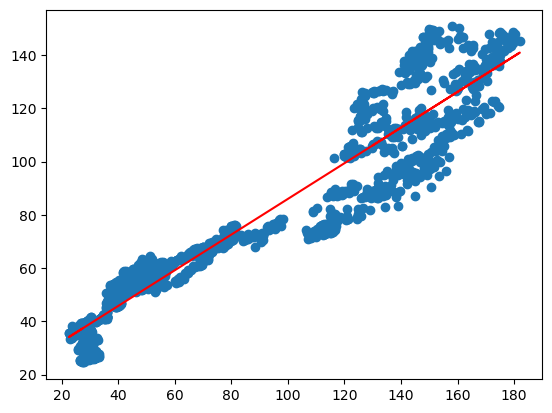

In [5]:
#Qualitative Approach
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

data = pd.read_csv("data/APPL_GOOG_HistoricalStockData.csv")  # load data set
data = data[["APPLClose", "GOOGClose"]] #subset only the closing prices
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [47]:
#Quantitative Approach
data = pd.read_csv("data/APPL_GOOG_HistoricalStockData.csv")  # load data set

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X1, y1 = data[['GOOGClose']], data.APPLClose

#fit regression model
model.fit(X1, y1)
RegCoef = model.coef_
RegInterc = model.intercept_
print("Regression Coefficient: ", RegCoef, " Regression Intercept ", RegInterc)
#At this point I gave up trying to get the summary stats so I switched to a different package. 

Regression Coefficient:  [1.36764224]  Regression Intercept  -19.826768359749806


In [50]:
#Here I use a different package that gives me the summary stats. Below I will walk through the interpretations. 

import statsmodels.api as sm

data = pd.read_csv("data/APPL_GOOG_HistoricalStockData.csv")  # load data set
#data = pd.read_csv("data/ControlData.csv")  # load alternative data set

#define predictor and response variables
x = data['GOOGClose'] #predictor
y = data[['APPLClose']] #Criterion

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              APPLClose   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.199e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        15:20:08   Log-Likelihood:                -8198.0
No. Observations:                2014   AIC:                         1.640e+04
Df Residuals:                    2012   BIC:                         1.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8268      0.701    -28.265      0.0

C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Const Coef: -19.8268. This is the value of the criterion if all the predictors were 0. It is the intercept in other words.
GOOGClose Coef: 1.3676. This is the amount that the criterion increase by when the predictor increases by 1.
GOOGClose std err: This is the amount of error in the predictive capabilities. The lower the better
GOOGClose t: Coef/std err = t. t represents the difference between the variation in the variables (I think)
GOOGClose P>|t|: This is the significance level of the predictor.
GOOGClose [0.025 - 0.975]: This is the confidence interval, you can see it varies little. 

Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob (Omnibus) is relatively high so the data is somewhat normal, but not altogether ideal. A linear regression approach would probably be better than random guessing but likely not as good as a nonlinear approach.

Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. In this case, the data is close, but within limits.

Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. In this case we do.

Condition Number – This test measures the sensitivity of a function's output as compared to its input (characteristic #4). When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30.

AIC: AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model.

BIC: An estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup.

Prob (F): Signficance of model. 

R: Correlation

R-Squared: Variance Explained.

Resource: https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

Now we can take a look at multiple regression. The only difference is using multiple predictors to find an outcome.

Video: https://www.youtube.com/watch?v=zITIFTsivN8&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=5

In [48]:
#Here I use a different package that gives me the summary stats. Below I will walk through the interpretations. 

import statsmodels.api as sm

data = pd.read_csv("data/ControlData.csv")  # load data set

#define predictor and response variables
x = data[['Halves', "Quarters"]] #predictors
y = data[['Ones']] #Criterion

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Ones   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.766e+30
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        13:17:03   Log-Likelihood:                 24878.
No. Observations:                1000   AIC:                        -4.975e+04
Df Residuals:                     998   BIC:                        -4.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1667   2.01e-13  -5.81e+12      0.0

C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


It is worth noting there are many types of regression. 

Linear: The linear regression model consists of a predictor variable and a dependent variable related linearly to each other.

Logistic: Regression analysis technique, which gets used when the dependent variable is discrete. Example: 0 or 1, true or false, etc. 

Video course on Logistic Regression: https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe

Ridge: Usually used when there is a high correlation between the independent variables. This is because, in the case of multi collinear (multicollinearity) data, the least square estimates give unbiased values. But, in case the collinearity is very high, there can be some bias value. Therefore, a bias matrix is introduced in the equation of Ridge Regression. This is a powerful regression method where the model is less susceptible to overfitting.

Lasso: Performs regularization along with feature selection. It prohibits the absolute size of the regression coefficient. As a result, the coefficient value gets nearer to zero, which does not happen in the case of Ridge Regression.

Polynomial: the same as Multiple Linear Regression with a little modification. In Polynomial Regression, the relationship between independent and dependent variables, that is X and Y, is denoted by the n-th degree. The best fit line in Polynomial Regression that passes through all the data points is not a straight line, but a curved line, which depends upon the power of X or value of n.

Bayesian Linear Regression: Uses the Bayes theorem to find out the value of regression coefficients. In this method of regression, the posterior distribution of the features is determined instead of finding the least-squares. Bayesian Linear Regression is like both Linear Regression and Ridge Regression but is more stable than the simple Linear Regression.

More: Elastic Net Regression, JackKnife Regression, Stepwise Regression, Ecological Regression, Heirarchical, Simple Slopes (moderation)

Resource: https://www.upgrad.com/blog/types-of-regression-models-in-machine-learning/

Finally, with some complicated math we can determine the significance of predictors, or a set of predictors, using a Wald's Test. 

Reading (turn on incognito mode for medium articles): https://medium.com/@analyttica/understanding-wald-test-2e3fa7723516#:~:text=Wald%20test%20is%20used%20to,in%20case%20of%20logistic%20regression.&text=This%20technique%20is%20used%20to,or%20models%20with%20continuous%20variables.

In conclusion for regression, we are simply trying to account for variance (described by RSquared) in order to predict a criterion (dependent variable).

<b> Chi-Square </b>

There are two kinds of Chi-Square, the one-way and two way.

The one-way chi square (goodness of fit) tests whether the observed frequencies in your data fit an expected null hypothesis. This can be used to see if your data is what you expected. This uses 1 categorical variable and a dependent variable. This is artifactual, see comment at bottom of this section for more. It is worth noting that Fisher's Exact Test (Fisher's z-test) is a better than Goodness of Fit when the sample size is small. However, when sample size is large, it is better to use a G-Test.

The two-way chi square (Pearson's ChiSquare, test of independence) tests whether the frequencies of one variable differ depending on the level of another variable. Both variables must be catagorical. This uses one dependent variable from different groups. When the data is pairwise, you should use the McNemar Test (1947). McNemar's ChiSquared is similar to within-subjects ANOVA at 2-levels. An upgraded version is Cochran's Q test to find dichotomous differences betweena  dependent variable between three or more related groups (similar to a one-way repeated measures ANOVA for dichotomous variables, see ANOVA section for more details).

Video: https://www.youtube.com/watch?v=7_cs1YlZoug&pp=ygUKY2hpIHNxdWFyZQ%3D%3D

Other Chi-Square Tests

z-tests: If you are interested in the size of the difference between two populations in Goodness of Fit

GSquared: Test for whether two univariate random variables are independent and to measure the strength of their relationship. Almost the same as R^2. 

Breslow-Day Test: This has to do with likelihood ratios which I do not cover here. 

Cochran-Mantel-Haenszel Test: This has to do with likelihood ratios which I do not cover here. 

Reading: https://en.wikipedia.org/wiki/Lady_tasting_tea

<b> t-test </b>

In [64]:
import pandas as pd
from scipy.stats import ttest_ind #import ttest data

df = pd.read_csv("data/NBAarchive/Advanced.csv")  # load data set
df.head()

seas_id  season  player_id        player  birth_year pos   age  experience  \
0    30458    2023       5025    A.J. Green         NaN  SG  23.0           1   
1    30459    2023       5026   A.J. Lawson         NaN  SG  22.0           1   
2    30460    2023       5026   A.J. Lawson         NaN  SG  22.0           1   
3    30461    2023       5026   A.J. Lawson         NaN  SG  22.0           1   
4    30462    2023       4219  Aaron Gordon         NaN  PF  27.0           9   

    lg   tm  ...  tov_percent  usg_percent  ows  dws   ws  ws_48  obpm  dbpm  \
0  NBA  MIL  ...          6.6         16.6  0.5  0.3  0.8  0.111  -0.3  -0.6   
1  NBA  TOT  ...          5.9         21.1  0.1  0.1  0.1  0.063  -1.5  -2.9   
2  NBA  MIN  ...          0.0         21.4  0.0  0.0  0.0  0.377  -2.3   7.5   
3  NBA  DAL  ...          6.1         21.1  0.1  0.1  0.1  0.057  -1.5  -3.1   
4  NBA  DEN  ...          9.8         21.1  4.6  2.2  6.8  0.158   2.4  -0.3   

   bpm  vorp  
0 -0.9   0.1  
1 -4.4  -0.1  
2  5.2   0.0  
3 -4.6  -0.1  
4  2.1   2.1  

[5 rows x 32 columns]

A t-test compares the variance between the means of data. If you get a significant result, you know that the means are different.

There are 4 common types of t-test:

Two Sample t-test (also known as an independent t-test, independent sample t-test, students t-test): This compares two sample means to determine if they are different.

One sample t-test: Compares the mean of a sample to a value predetermined (perhaps you know a threshold you need to meet)

Paired Sample's t-test: This compares a variable on the sample experimental unit. This is typically a longitudinal (temporal) comparison between variable 1 at time A and variable 1 at time B. 

Welch's t-test: This is the same as Two Sample t-test. However, this is used when an assumption of homogeneity of variance and homogeneity of sample size is not met.

Other t-tests are Trimmed Means t-test (winsorized variances; N.H. Anderson, 2001; Lee and Fung, 1985).

Assumptions:

All t-test must meet homogeneity of variance (Levene and Bartlett's Test, or O'Brien's variance test (I think this is very uncommon)) and homogeneity of sample size (I am not aware of a quantitative test for this) assumptions except for Welch (at the cost of power). Also, all t-test must meet an assumption of homogeneity of normality (Shapiro-Wilkes Test, or Kolmogorov-Smirnov, the data is normally distributed). Note that in ANOVA, homogeneity of variance is analyzed using Hartley's Test of FMax.

Reading: https://thedatascientist.com/how-to-do-a-t-test-in-python/

Video: https://www.youtube.com/watch?v=NF5_btOaCig&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=5

Next I will dive into Independent Samples t-test.

In [65]:
from scipy.stats import shapiro
#First I will do a test of normality.

df2=df[df['tm']=="MIN"]['bpm'] #Isolate bpm for Min
df3=df[df['tm']=="ATL"]['bpm'] #Isolate bpm for Min

#df2 = df2[df.bpm != "NA"] #Remove NA values shown in Excel
#df2 = df2[df.bpm != "NaN"] #I noticed pandas showed NaN values so I removed those just in case
df=df.dropna() #These remove NaNs from data. The former 2 did not work properly
df=df.dropna(axis=1)

#print(df2)

df2 = df2.to_frame() #Run this to convert the df_close to a data frame so we can use the following functions.
df3 = df3.to_frame()
#print(df2) #print if you need to
shapiro(df2.bpm) #calculate Shapiro-Wilkes Test of normality

ShapiroResult(statistic=0.8331124782562256, pvalue=5.922175241859536e-24)

In [66]:
from scipy.stats import kstest #Kolmogorov-Smirnov Test
kstest(df2.bpm, 'norm') #Computer Kolmogorov-Smirnov Test of normality

#both quant test of normality are drastically below .05, meaning they are 

KstestResult(statistic=0.5101129890021964, pvalue=4.4195658280466266e-138)

In [78]:
from scipy.stats import levene

df4 = df3["bpm"] #Here I strip the data that is not part of the "bpm" set, also makes it unidemensional
df5 = df2["bpm"] 

#print(df3)

df4=df4.dropna(axis=0) #Here i drop NaN values
df5=df5.dropna(axis=0)

stat, p = levene(df4, df5) #Compute Levene test
print(stat, p)

#A p-value greater than .05 means the variances are not significantly different.

0.14352691321681696 0.7048565332422354


So what if you do not meet assumptions? This article suggests switching to non-parametric tests but I am still trying to find the line between violation and switching. 

https://www.spss-tutorials.com/spss-anova-levenes-test-significant/

In [79]:
#Here I will conduct a t-test on BPM
#Box plus-minus is based on box score for evaluating basketball players' quality and contribution to the team 
#from play-by-play regression.

#df = df[df.bpm != "NA"]
#df = df[df.bpm != "NaN"]

df=df.dropna()
df=df.dropna(axis=1)

group1 = df[df['tm']=='MIN']
group2 = df[df['tm']=='ATL']

#print(group2)

ttest_ind(group1['bpm'], group2['bpm']) 

Ttest_indResult(statistic=-2.708902053060279, pvalue=0.011782961193680904)

The good thing about GLMs is they are robust enough to violate an assumption of normality. Here we find the Team MIN has a statistically significant difference when compared to Team ATL scores. 

Reading: https://link.springer.com/article/10.3758/s13428-021-01587-5

Reading: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6467598/

<b> ANOVA </b>

Now I will compute an Analysis of Variance. An ANOVA is basically a t-test with more than 2 groups. Three kinds of standard ANOVA are conventionally used. These are also known as an omnibus test (this is general, ANOVA is a type) because they measure multiple variables (means) at once.

One-Way ANOVA: 1 IV

Two-Way ANOVA: 2 IV

N-Way ANOVA (ANOVAN, NANOVA): N-way ANOVA to determines if the means in a set of data differ with respect to groups (levels) of multiple factors. For example, potential differences in IQ scores can be examined by Country, Gender, Age group, Ethnicity, etc, simultaneously.

Welch's One-Way ANOVA: Same as One-Way ANOVA but is non-parametric, it does not assume homogeneity of variance.	Balances power and chances of type I best of F tests (Tomarken, 1986)

You may also see the term f-test, or Fisher-test. This is the test underlying an analysis of variance which compares the variances of groups. ANOVA separates the within group variance from the between group variance and the F-test is the ratio of the mean squared error between these two groups. My understanding is that this 

f-Test (Fisher's Test):

Snedecort's f: 

Fisher-Snedecort's f:

Kruskall-Wallace f-test: One Way ANOVA on ranks, nonparamtric. This is a modern and upgraded version of the Mann-Whitney U Test but is rarely used.Can also be used for Multivariante Kruskall-Walle (MANOVA) test or MKV.

Brown-Forsythe: Use this for sample size <6 sample size, unequal sample sizes, breaks assumptions of homogeneity. This will have more power than Welch but greater chance of type I.

Cochran's Q: A  one-way repeated measures ANOVA for dichotomous variables. Looks for differences between groups in nonparametric dichotomous experiments with three or more measures over time or conditions. Determines using two-way randomized block designs with 2 outcomes if k (k means groups, n means sample size) treatments have identical effects. No assumption of normality but must have 4 different responses atleast between measures

Reading: https://stats.stackexchange.com/questions/166876/the-f-test-is-a-test-for-variance-so-why-do-we-use-f-test-in-anova#:~:text=ANOVA%20separates%20the%20within%20group,error%20between%20these%20two%20groups.

Video 1: https://www.youtube.com/watch?v=oOuu8IBd-yo

Video 2: https://www.youtube.com/watch?v=wo1xlefg5KI

In [80]:
from scipy.stats import f_oneway

df2=df[df['tm']=="MIN"]['bpm'] #Isolate bpm for Min
df3=df[df['tm']=="ATL"]['bpm']
df6=df[df['tm']=="DAL"]['bpm']

f_oneway(df2, df3, df6)

F_onewayResult(statistic=4.916381792630272, pvalue=0.013744683824629468)

In [1]:
#Because we found significance in the above result, we need to identify what comparison is significant
#Here we will conduct a Tukey test of multiple comparisons to identify it. 

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np


tukey = pairwise_tukeyhsd(endog=df['bpm'],
                          groups=[(df['tm']=="MIN") | (df['tm'] == "ATL") | (df['tm'] == "DAL")],
                          alpha=0.05)
print(tukey)

NameError: name 'df' is not defined

In the above example we used a Tukey post-hoc test of multiple comparisons. There are many other post-hoc MC tests to choose from. These are also known as HSD tests or honest significant difference tests.

Tukey Test: Unplanned comparisons, Convervative, uses studentized range distribution. Compares mean to other means. Uses pairwise comparisons.

Scheffee Test: Unplanned comparisons, least power, Convervative, uses F-distribution, but can compare multiple groups at a time. Used for non-pairwise comparisons. 

Bonferonni Test: Planned comparisons, most power.

Reading: https://www.statology.org/tukey-vs-bonferroni-vs-scheffe/

Newman-Keuls: Also uses studentized range distribution (the distribution was developed by Gosset when working for Guiness, he is an interesting person to read about). The number of means within a range changes with each successive pairwise comparison, the critical value of the q statistic also changes with each comparison, which makes the Neuman-Keuls method more lenient and hence more powerful than Tukey's range test. Most popular method in psychology and has more power than Tukey.

T Dunnet: Compares every mean to a control mean. 

Dunn-Sidak:

Fisher-Hayter:

Duncan Test (Duncans MRT, Multiple Range Test): Post-hoc test when there is not significance from the ANOVA, it will find signficance levels between means.

Games-Howell: Nonparametric tukey test for unequal sample size and unequal variance. Used in paraiwise comparisons. It is a t-test using Welch's degree of freedom. This is an upgrade version of the Tukey-Kramer test.

For interpretation of GLM effect sizes, see "Effect Sizes" in Episode II.

<b> Other kinds of ANOVA </b>

It is also worth recognizing other analyses that build off of ANOVA. 

The first is MANOVA: The Multivariate analysis of variance (MANOVA) procedure provides regression analysis and analysis of variance for multiple dependent variables by one or more factor variables or covariates. The factor variables divide the population into groups.

ANCOVA: The analysis of covariance is a combination of an ANOVA and a regression analysis. In basic terms, the ANCOVA examines the influence of an independent variable on a dependent variable while removing the effect of the covariate factor.

MANCOVA: Multivariate analysis of covariance (MANCOVA) is a statistical technique that is the extension of analysis of covariance (ANCOVA). Basically, it is the multivariate analysis of variance (MANOVA) with a covariate(s).).

Rank Tranform ANOVA f-test (Conover and Iman, 1981): ANOVA applied to ranks of data instead of the data itself.

Peritz' F Test:

Wilks Lambda is a statistic primarily used in MANOVA type analyses that tests whether there are differences between the mean sof identified groups of subjects on a combination of dependent variables. Similarly, Pillai's Trace (nonparametric) is a statistic in MANOVA that tests the effect of an indendent variable on a dependent variable. Hotelling-Lawly is similar to Pillai but it is parametric. Finally, Roy's largest root uses eigenvalues to determine whether some item contributes more to a model.

Reading: https://newprairiepress.org/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1299&context=agstatconference

<b> Bonus: Choosing a Test </b>

Here I will paste a really nice explanation for distinguishing tests. GLM uses variance to compare models/data, so it is easy to get confused between tests that seemingly all do the same thing.

Start: 

We use these tests for different reasons and under different circumstances.

z
-test. A z test assumes that our observations are independently drawn from a Normal distribution with unknown mean and known variance. A z test is used primarily when we have quantitative data. (i.e. weights of rodents, ages of individuals systolic blood pressure, etc.) However, z tests can also be used when interested in proportions. (i.e. the proportion of people who get at least eight hours of sleep, etc.)

ttest. A ttest assumes that our observations are independently drawn from a Normal distribution with unknown mean and unknown variance. Note that with a ttest, we do not know the population variance. This is far more common than knowing the population variance, so a ttest is generally more appropriate than a ztest, but practically there will be little difference between the two if sample sizes are large.

With z and t tests, your alternative hypothesis will be that your population mean (or population proportion) of one group is either not equal, less than, or greater than the population mean (or proportion) of the other group. This will depend on the type of analysis you seek to do, but your null and alternative hypotheses directly compare the means/proportions of the two groups.

Chi-squared test. Whereas z and t tests concern quantitative data (or proportions in the case of z), chi-squared tests are appropriate for qualitative data. Again, the assumption is that observations are independent of one another. In this case, you aren't seeking a particular relationship. Your null hypothesis is that no relationship exists between variable one and variable two. Your alternative hypothesis is that a relationship does exist. This doesn't give you specifics as to how this relationship exists (i.e. in which direction the relationship goes) but it will provide evidence that a relationship does (or does not) exist between your independent variable and your groups.

Fisher's exact test. One drawback to the chi-squared test is that it is asymptotic. This means that the pvalue is accurate for very large sample sizes. However, if your sample sizes are small, then the p value may not be quite as accurate. As such, Fisher's exact test allows you to exactly calculate the p value of your data and not rely on approximations that will be poor if your sample sizes are small.

I keep discussing sample sizes - different references will give you different metrics as to when your samples are large enough. I would just find a reputable source, look at their rule, and apply their rule to find the test you want. I would not "shop around", so to speak, until you find a rule that you "like".

Ultimately, the test you choose should be based on a) your sample size and b) what form you want your hypotheses to take. If you are looking for a specific effect from your A/B test (for example, my B group has higher test scores), then I would opt for a z test or t test, pending sample size and the knowledge of the population variance. If you want to show that a relationship merely exists (for example, my A group and B group are different based on the independent variable but I don't care which group has higher scores), then the chi-squared or Fisher's exact test is appropriate, depending on sample size.

Reference: https://stats.stackexchange.com/questions/178854/a-b-tests-z-test-vs-t-test-vs-chi-square-vs-fisher-exact-test

<b> Advanced: How are all GLM tests also regression tests? </b>

Reading: https://stats.stackexchange.com/questions/59047/how-are-regression-the-t-test-and-the-anova-all-versions-of-the-general-linear

<b> Advanced: Meta-Analysis </b>

It is also possible to test the differences between tests that have already been done. This is known as meta-analysis. 

P-Curve analysis: See on Episode II

Begg's Test:

Egger Test:

<b> Conclusion </b>

Congratulations on completing Episode 3. This is the conclusion of our statistics material. I hope you understand important statistical concepts like determining test types, p-values, alpha, betas, assumption testing, and the relationship between general linear models. 

In Episode IV, we will explore the basics of machine learning.

Bonus: https://www.youtube.com/watch?v=CqLGvwi-5Pc&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=6